In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("1553768847-housing.csv")
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
#Dropping unecessary columns that will not be used in data analysis
#i.e ocean proximity
if "ocean_proximity" in df.columns:
    df=df.drop(columns=["ocean_proximity"])
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  median_house_value  
0         322         126         8.3252              452600  
1        2401        1138         8.3014              358500  
2         496         177         7.2574              352100  
3         558         219         5.6431              341300  
4         565         259         3.8462              342200

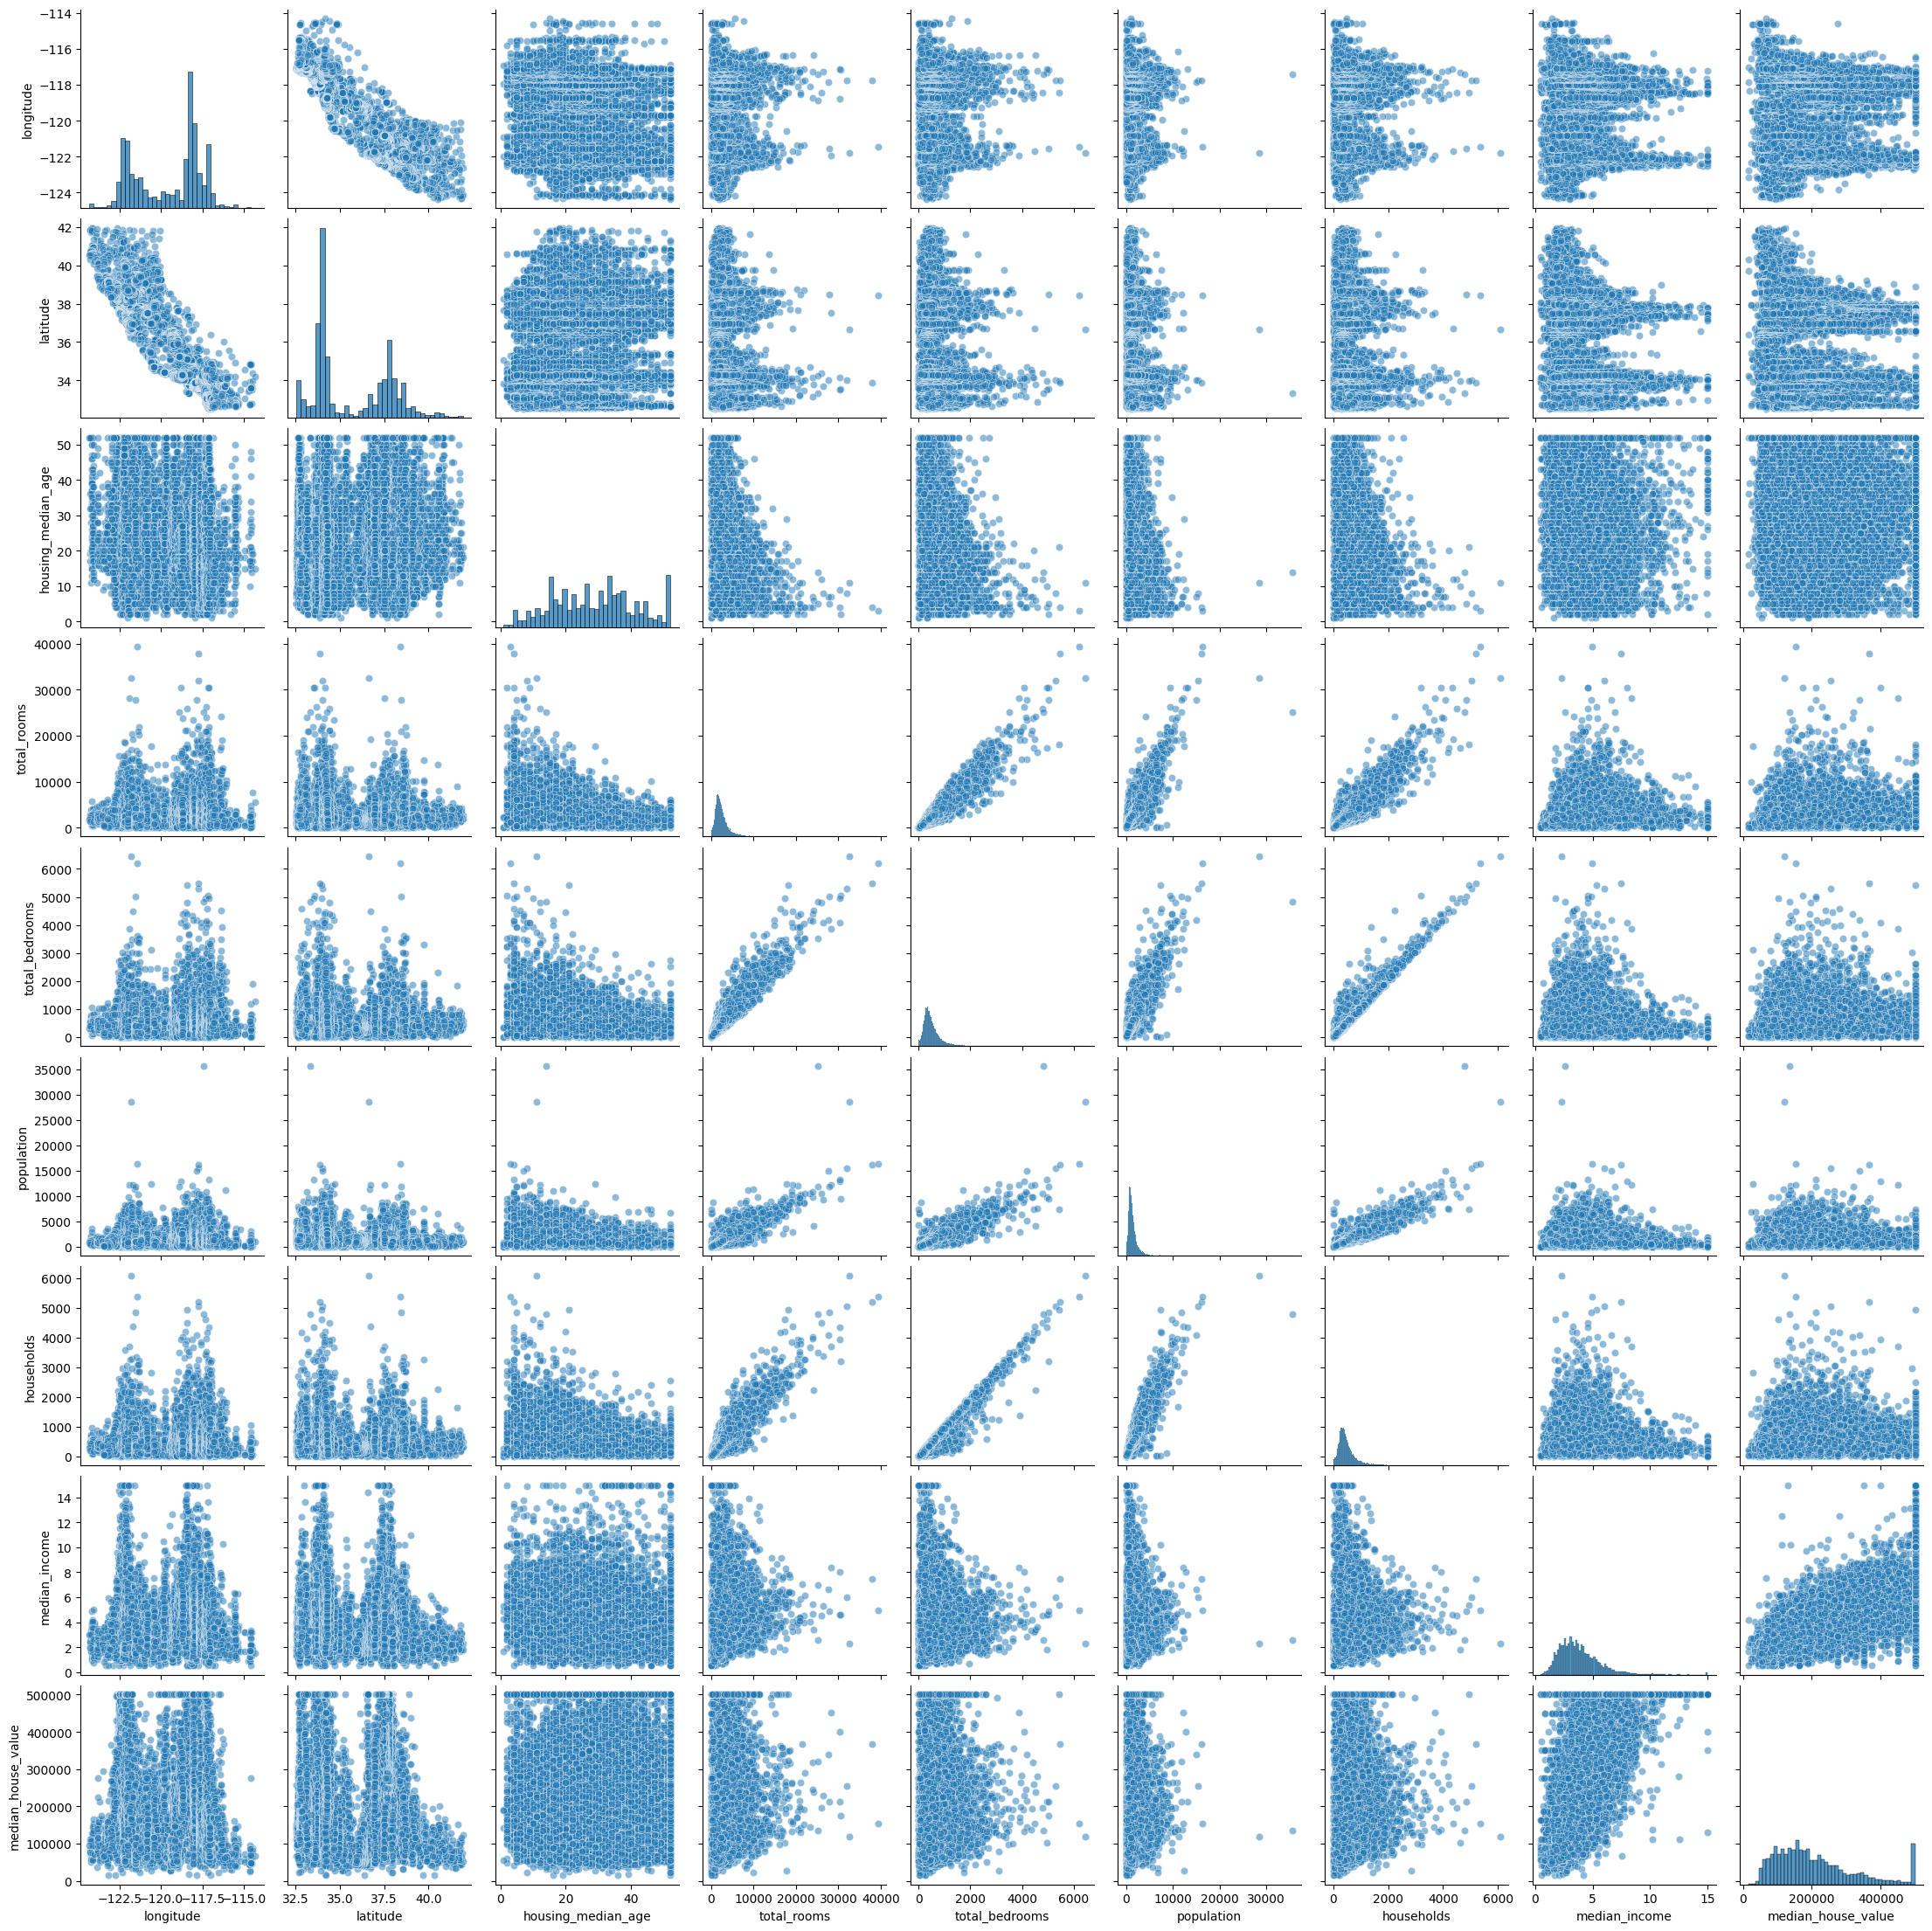

In [10]:
#show how every numeric variable in the dataset relates to every other one. 
sns.pairplot(df,kind="scatter", plot_kws={"alpha": 0.5})

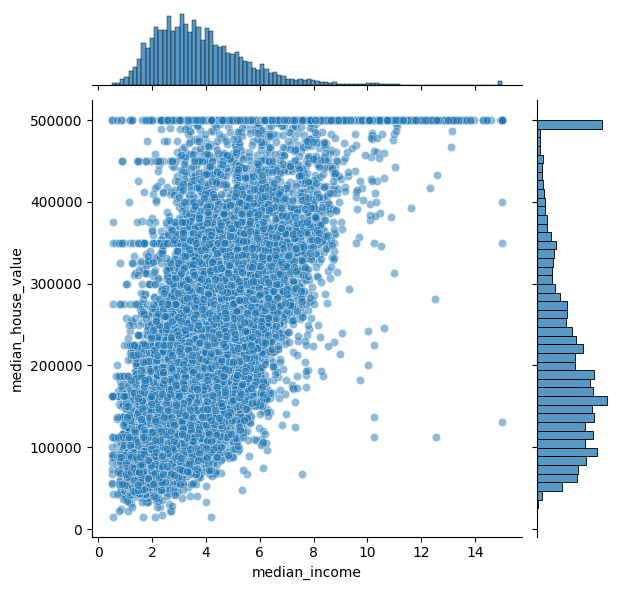

In [8]:
#Extract the x-independent variable and Y-the dependent variable
#x-median_income ,Y-median_house_value

#EDA
sns.jointplot(x="median_income",y="median_house_value",data=df,alpha=0.5)

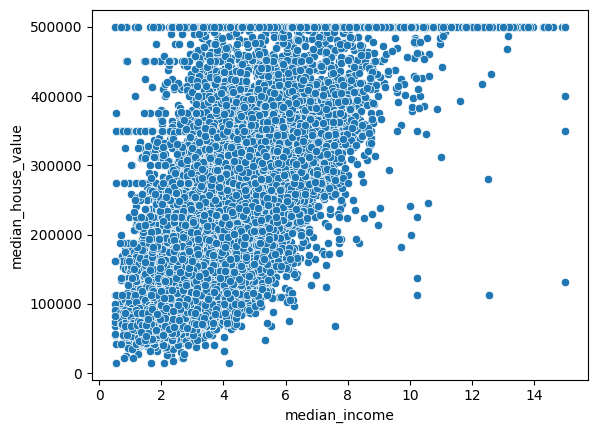

In [15]:
sns.scatterplot(x=df["median_income"],y=df["median_house_value"])
plt.show()

In [13]:
#Handling missing columns by filling the missing values with the mean of the respective column.
"""import numpy as np
for i in df.columns:
    if i ==df.isnull():
        i=np.mean(df.columns)"""


'import numpy as np\nfor i in df.columns:\n    if i ==df.isnull():\n        i=np.mean(df.columns)'

In [ ]:
#Encode categorical data :


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
x=df[["median_income"]]
y=df["median_house_value"]

In [25]:
#Split the dataset
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.2,random_state=42)


In [26]:
#Train the model
lm=LinearRegression()
lm.fit(x_train,y_train)
print(f"Coefficient {lm.coef_}")
print(f"Intercept {lm.intercept_}")

Coefficient [41224.80592887]
Intercept 47595.369540204556


In [29]:
#Predictions on the data
y_pred=lm.predict(x_test)
for i in y_pred:
    print(i)

181971.74694593807
204764.9421440084
218938.03042235272
127674.55505702789
194116.57477258216
320614.89176530926
151448.90063620528
376948.58906710544
109432.57843350443
312530.7073226585
221428.0087004563
139539.05420335568
166116.68658569598
134052.03253422354
163540.1362151418
178141.96247514637
166833.99820885825
229244.23190456937
222099.9730370968
106666.39395567749
138021.98134517338
399758.2741875474
159607.28972952795
112524.43887816943
140693.34876936395
270914.2657374677
81614.07939270526
192042.96703436016
207514.6366994638
150166.8091718175
159792.80135620784
215421.5544766204
164055.44628925266
151147.9595529245
189495.2740279562
195563.56546068538
130535.55658849122
179106.62293388185
256926.6890858033
87591.67625239091
509222.5013704668
210021.1048999389
213137.7002281612
295727.4764260525
197196.0677754685
181035.9438513528
164743.90054826473
179337.4818470835
175932.3128773591
214654.77308634348
146691.55803201406
232076.3760718825
171269.7873268043
157574.90679723484

In [31]:
#Evaluate the model
import numpy as np
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)

print(mae)
print(mse)
print(r_squared)
print(rmse)

62661.94186677953
6993417642.157331
0.4768453300270462
83626.65628947107


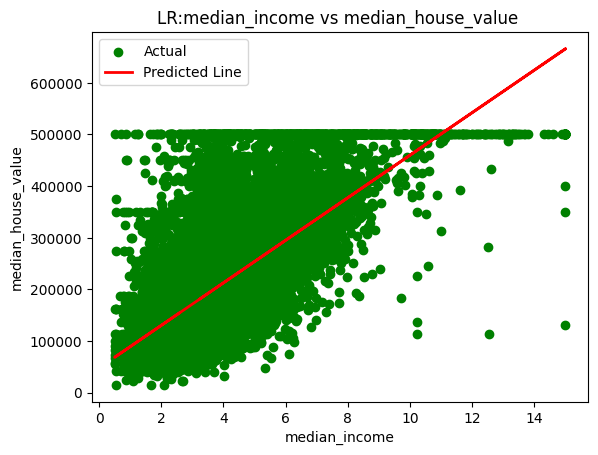

In [33]:
# Step 9: Visualization
plt.scatter(x_test, y_test, color='green', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.title("LR:median_income vs median_house_value ")
plt.legend()
plt.show()

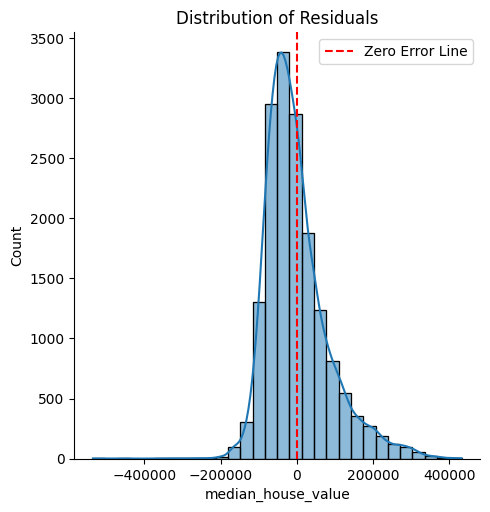

In [36]:
#Residual analysis
#Residuals -is the difference betwen the actual value and the predicted value for a given data point
#should be cenetered around 0
#symmetrical like a bell curve
residuals = y_test - y_pred
sns.displot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.axvline(x=0, color='red', linestyle='--', label='Zero Error Line')
plt.legend()
plt.show()



In [ ]:
#Modern interpretation and business insghts
